In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")
import scipy.stats as stats
sns.set_color_codes()
import plotly_express as px

In [2]:
df=pd.read_csv('/Users/alfia/Desktop/Haberman/haberman.csv')
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
df.columns=['age', 'year', 'nodes', 'status']

In [4]:
df.head()

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
df.shape

(305, 4)

In [6]:
df['status'].value_counts()

1    224
2     81
Name: status, dtype: int64

In [7]:
df['status'].value_counts(normalize=True)

1    0.734426
2    0.265574
Name: status, dtype: float64

In [8]:
#Data is skewed, because almost 73% of data are present in the
#dataset is belonging to the same class

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [10]:
df.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [11]:
df.head()
#status -1 means Yes, 2 means No

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [12]:
df.status.value_counts()

1    224
2     81
Name: status, dtype: int64

In [13]:
survived_df = df[df["status"]==1]

In [14]:
survived_df.shape

(224, 4)

In [15]:
not_survived_df = df[df["status"]==2]

In [16]:
not_survived_df.shape

(81, 4)

In [17]:
df.shape

(305, 4)

In [19]:
#Univariate Analysis

In [20]:
def univariate_analysis(i):
    def dis(i):
        return sns.displot(df[i])
    def box(i):
        return sns.boxenplot(df[i])
    print(box(i))
    print(dis(i))
    print("---------")

In [21]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)
---------


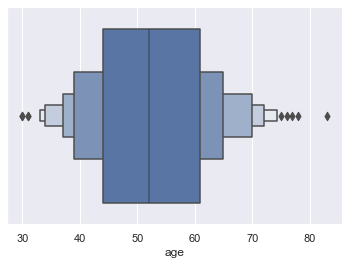

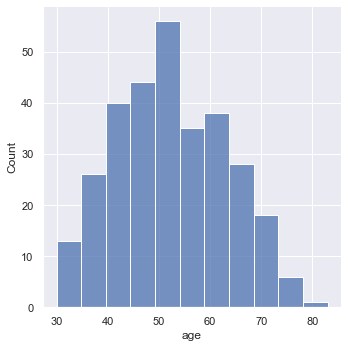

In [22]:
univariate_analysis('age')

AxesSubplot(0.125,0.125;0.775x0.755)
---------


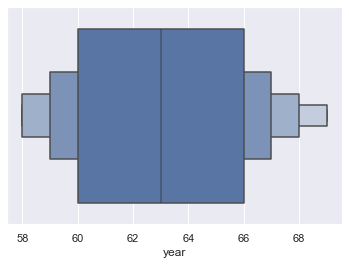

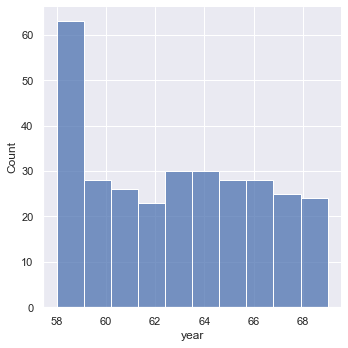

In [23]:
univariate_analysis('year')

AxesSubplot(0.125,0.125;0.775x0.755)
---------


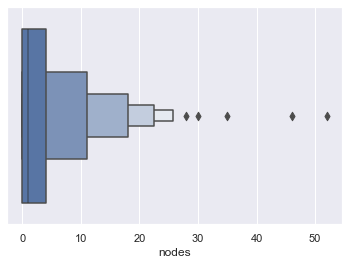

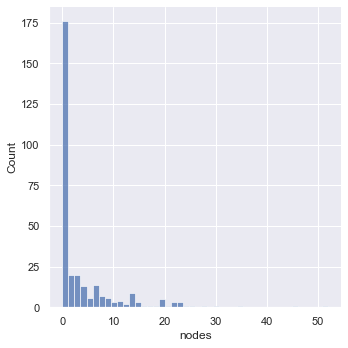

In [24]:
univariate_analysis('nodes')

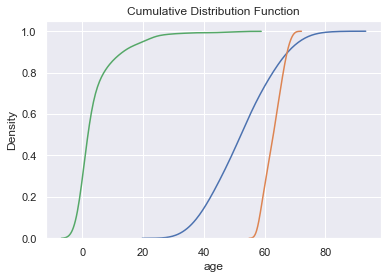

In [25]:
plt.title('Cumulative Distribution Function')
for feature in ['age', 'year', 'nodes']:
    sns.kdeplot(df[feature], cumulative=True)

In [26]:
#Bivariate Analysis

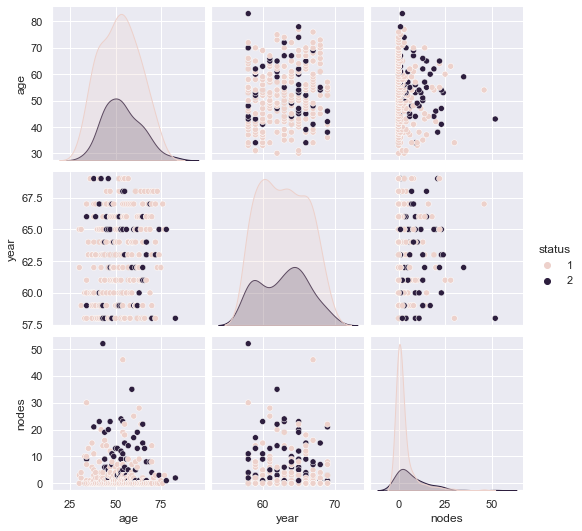

In [27]:
sns.pairplot(df, hue='status')

In [28]:
#Density and contour plots

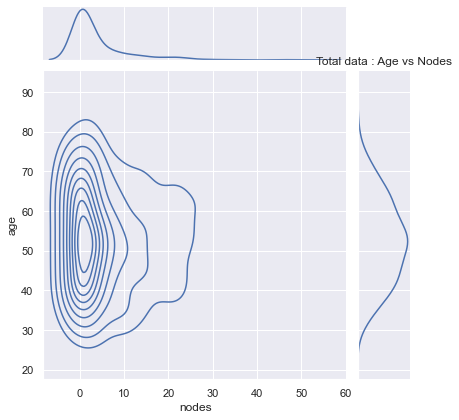

In [29]:
sns.jointplot(x='nodes', y='age', data=df,kind='kde')
plt.title('Total data : Age vs Nodes')
plt.show()

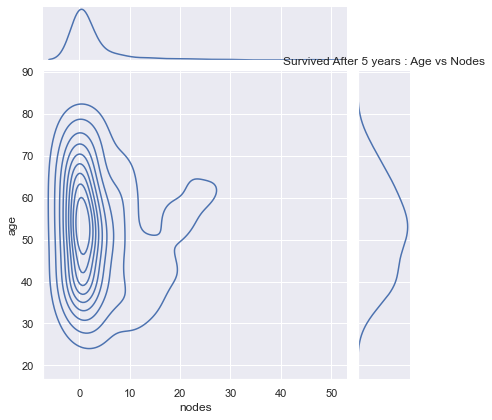

In [30]:
sns.jointplot(x='nodes', y='age', data=survived_df,kind='kde')
plt.title('Survived After 5 years : Age vs Nodes')
plt.show()

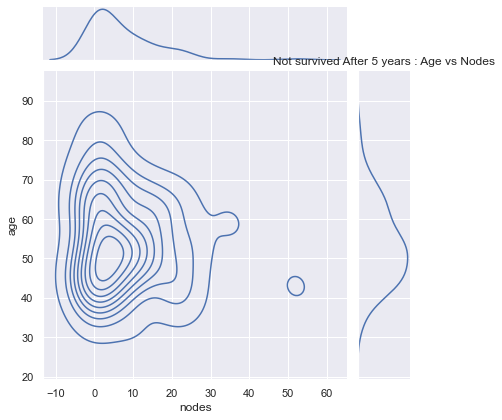

In [31]:
sns.jointplot(x='nodes', y='age', data=not_survived_df,kind='kde')
plt.title('Not survived After 5 years : Age vs Nodes')
plt.show()

Text(0.5, 1.0, 'Survived After 5 years : Operation Year vs Nodes')

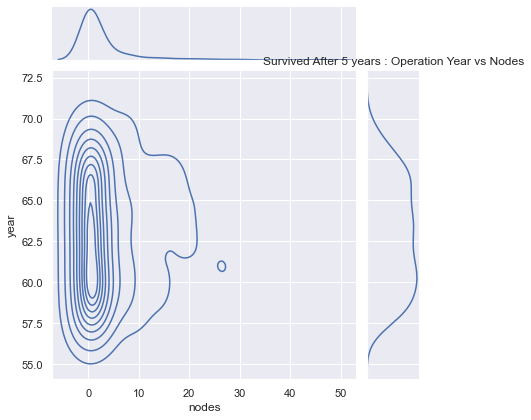

In [32]:
sns.jointplot(survived_df['nodes'], survived_df['year'],
              kind='kde')
plt.title('Survived After 5 years : Operation Year vs Nodes')

Text(0.5, 1.0, 'Not Survived After 5 years : Operation Year vs Nodes')

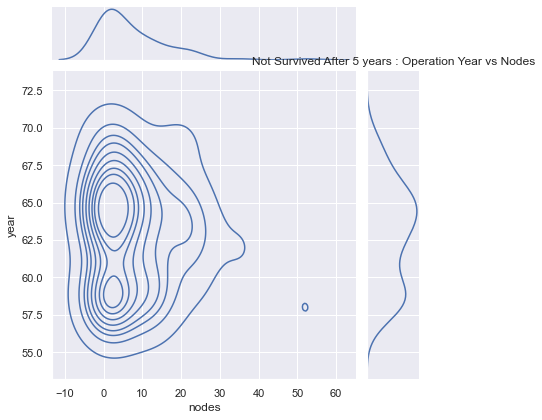

In [33]:
sns.jointplot(not_survived_df['nodes'], 
              not_survived_df['year'],kind='kde')
plt.title('Not Survived After 5 years : Operation Year vs Nodes')

Text(0.5, 1.0, 'Total : Age vs Operation Year')

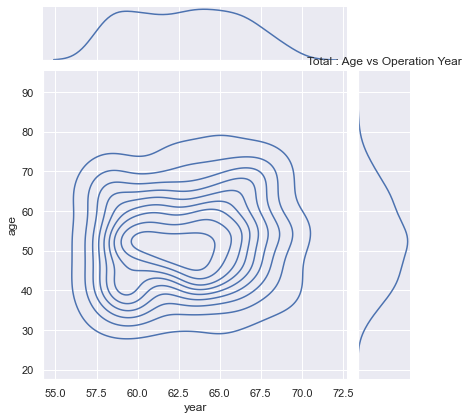

In [34]:
sns.jointplot(x='year', y='age', data=df,kind='kde',)
plt.title('Total : Age vs Operation Year')

Text(0.5, 1.0, 'Survived After 5 years : Age vs Operation Year')

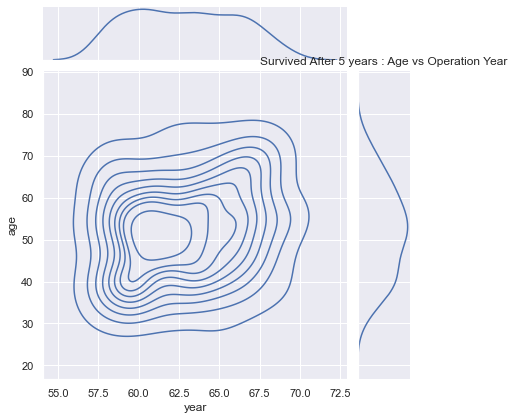

In [35]:
sns.jointplot(x='year', y='age', data=survived_df,kind='kde')
plt.title('Survived After 5 years : Age vs Operation Year')

<AxesSubplot:xlabel='year', ylabel='age'>

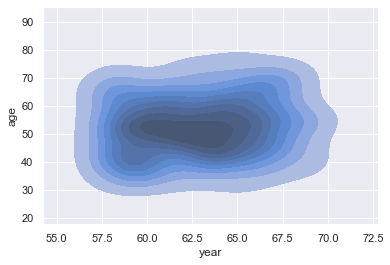

In [36]:
sns.kdeplot(x='year',y='age',data=df,shade=True)

Text(0.5, 1.0, 'Not survived After 5 years : Age vs Operation Year')

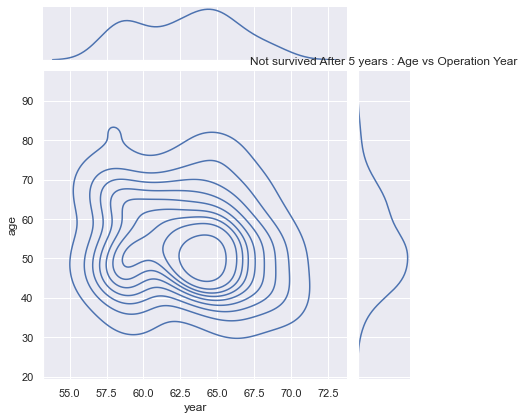

In [37]:
sns.jointplot(x='year', y='age', 
              data=not_survived_df,kind='kde',)
plt.title('Not survived After 5 years : Age vs Operation Year')

In [38]:
#Correlation

<AxesSubplot:>

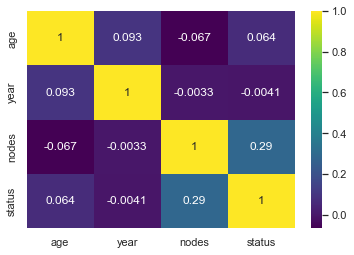

In [39]:
sns.heatmap(df.corr(),annot=True, cmap='viridis')

In [40]:
#Scatter plot

In [41]:
df.head(3)

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


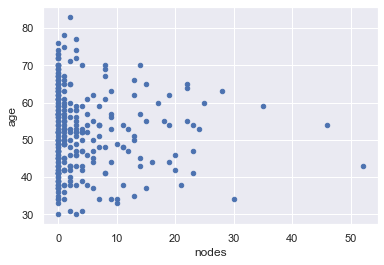

In [42]:
df.plot(kind='scatter', x='nodes', y='age') 
plt.show()

In [43]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [44]:
#Histograms

<AxesSubplot:xlabel='age', ylabel='Count'>

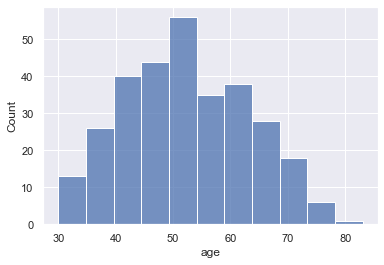

In [45]:
sns.histplot(data=df, x='age')

<AxesSubplot:xlabel='year', ylabel='Count'>

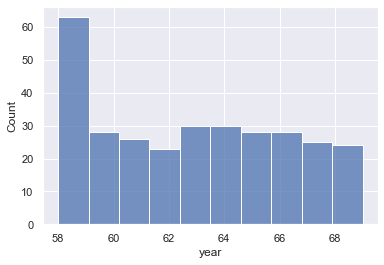

In [46]:
sns.histplot(data=df, x='year')

In [48]:
#3d plots

In [49]:
df.head(1)

,age,year,nodes,status
0,30,62,3,1


In [52]:
px.scatter_3d(df, x="age", y="year", 
              z="nodes", color="status",
              color_discrete_map = {"Joly": "blue",
                                    "Bergeron": "violet",
                                    "Coderre":"pink"})